In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("CleanData/final.csv")

In [41]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df['target']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (307, 20)
X_test shape: (132, 20)
y_train shape: (307,)
y_test shape: (132,)


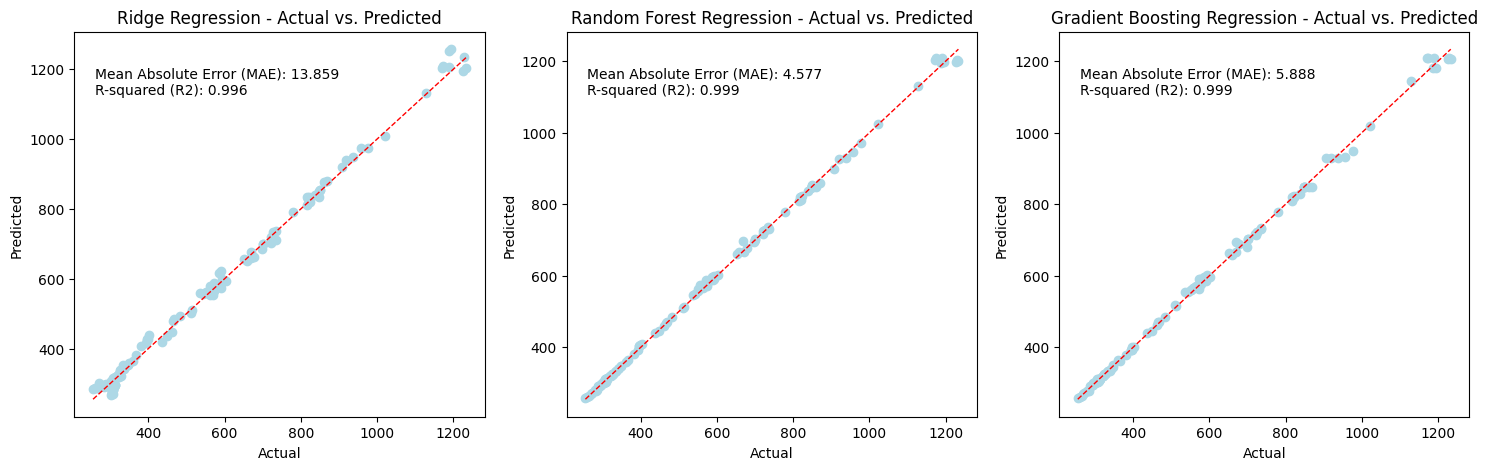

In [63]:
models = {
    'Ridge Regression': Ridge(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

fig, axs = plt.subplots(1, len(models), figsize=(18, 5))

for idx, (name, model) in enumerate(models.items()):
    pipeline = Pipeline([
        ('feature_selection', RFE(model)),
        ('regressor', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    axs[idx].scatter(y_test, y_pred, color='lightblue')
    axs[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
    axs[idx].set_xlabel('Actual')
    axs[idx].set_ylabel('Predicted')
    axs[idx].set_title(f'{name} - Actual vs. Predicted')
    axs[idx].text(0.05, 0.95, f"\nMean Absolute Error (MAE): {mae:.3f}\nR-squared (R2): {r2:.3f}",
                     transform=axs[idx].transAxes, verticalalignment='top')

plt.show()


In [64]:
data = {
    'Model': ['Ridge Regression', 'Random Forest Regression', 'Gradient Boosting Regression'],
    'MAE': [13.859, 4.577, 5.888],
    'R2': [0.996, 0.999, 0.999 ]
}
df = pd.DataFrame(data)

In [65]:
best_mae = df['MAE'].min()
worst_mae = df['MAE'].max()
best_r2 = df['R2'].max()
worst_r2 = df['R2'].min()

In [66]:
col_widths = [0.4, 0.08, 0.08]
cell_height = 0.1  

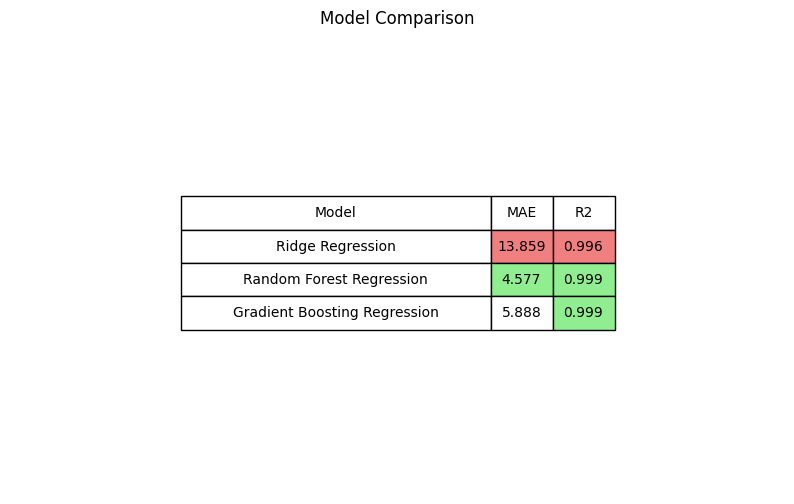

In [69]:
plt.figure(figsize=(10, 6)) 
colors = [['lightgreen' if val == best_mae or val == best_r2 else 'lightcoral' if val == worst_mae or val == worst_r2 else 'white' for val in row] for row in df.values]
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellColours=colors,
                  colWidths=col_widths,  
                  cellLoc='center',  
                  loc='center')
table.scale(1, 2) 
plt.axis('off') 
plt.title('Model Comparison')
plt.show()